# COMP9318 Lab1

# Submission Instructions

1. You should answer each question in the `lab1_submission.py` file.
2. You will receive an email in your `@student.unsw.edu.au` mailbox about how to access the submission system. 


# Question 0: An example (0 point)
We show the steps of how to complete the lab notebook and prepare your submission by the following example. You are required to implement a function that takes two arguments `a` and `b`, and outputs the sum of them.

You will be given the definition of the function like below:

In [1]:
def add(a, b): # do not change the heading of the function
    return a+b

**Step 1**: You need to put your implementation in the function body like below **(you should remove the `pass` line from the function body)**:

In [2]:
def add(a, b): # do not change the heading of the function
    return a + b

**Step 2**: you need to paste your code to **`Lab1_submission.py`**, which is originally contains only function definitions. We have done the Question 0 for you as an example.

## Tips

* If you choose to skip a question, leave the corresponding function body as it is (i.e., keep the `pass` line), otherwise it may affect your mark for other questions.

* You are allowed to add other functions and import modules (in fact you may have to in this lab), but you are not allowed to define global variables. I.e., **only functions are allowed** in `Lab1_submission.py`. Also be careful to not import unnecessary modules, as it may lead to an error too.

* You are allowed to submit as many times as you want before the deadline, but **ONLY the newest version will be kept and marked**.

# Question 1: Integer square root of an integer (25 points)

You need to write a function, `nsqrt()`, that takes as input an integer `x`, and return the largest integer that does not exceed $\sqrt{x}$. You need to abide by the following constraints:
1. The time complexity of your algorithm should be $O(\log x)$. 
2. You cannot use `sqrt()` function. 

For example, `nsqrt(11) = 3`, and `nsqrt(1369) = 37`. 


In [13]:
def nsqrt(x): # do not change the heading of the function
    import math
    if x <= 1: 
        return x
    if x == 2:
        return 1
    goal = int(x/2)

    while goal**2 > x:
        goal = int(goal/2)
    up = goal * 2
    low = goal

    while up - low > 1:
        if ((up + low)/2) **2 <= x:
            low = math.floor((up + low)/2)
        else:
            up = math.ceil((up + low)/2)
    if up ** 2 <= x:
        return up
    return low

        

you can test your implementation using the following code.

In [14]:
print(nsqrt(17), nsqrt(1369))


4 37


Use [Newton's method](https://en.wikipedia.org/wiki/Newton's_method) to find a root of an equation numerically. Newton's method starts from $x_0$ and iteratively computes $$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

Let us consider find a $x$ such that $f(x) = x \ln(x) - 16 = 0$. First, we plot the function and it seems $x$ is close to 8.0.

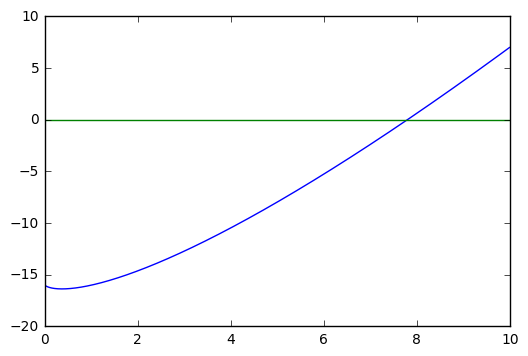

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import math

def f(x):
    return x * math.log(x) - 16.0

xvals = np.arange(0.01, 10, 0.01)        
yvals = np.array([f(x) for x in xvals])
plt.plot(xvals, yvals) 
plt.plot(xvals, 0*xvals)
plt.show()

To find $x$ for the equation, we need to compute the derivative of $f(x)$, i.e., $f'(x)$ first. 

$$f'(x) = (x \cdot \frac{1}{x} + 1 \cdot \ln(x)) + 0 = 1 + \ln(x)$$ 

We implement it as `fprime(x)`:

In [4]:
def fprime(x):
    return 1.0 + math.log(x)

Now you need to implement Newton's method below.

In [7]:
'''
x_0: initial guess
EPSILON: stop when abs(x - x_new) < EPSILON
MAX_ITER: maximum number of iterations

NOTE: you must use the default values of the above parameters, do not change them
'''
def find_root(f, fprime, x_0=1.0, EPSILON = 1E-7, MAX_ITER = 1000): # do not change the heading of the function
    timer = MAX_ITER
    x = x_0
    while timer:
        timer -= 1
        x_1 = x
        x = x - f(x)/fprime(x)
        if abs(x - x_1) <= EPSILON:
            return x
    return x

You can test your implementation using the following code.

Note that we will test your code using a different $f(x)$ (and its corresponding $f'(x)$). You need to perform similar tests by yourself. 

In [8]:
x = find_root(f, fprime)
print(x)
print(f(x))

7.792741452820329
0.0


# Question 3: Trees (25 + 25 points)

You need to perform the following two tasks: 
1. Build a tree from a string that represents an pre-order traversal of the tree. 
2. Compute the max depth of the tree. 

We provided the following `Tree` class, and a helper function, `str_to_tokens()`, which parses the string and returns an array of tokens. 

In [9]:
# Note: pay attention to how to determine if a node is a leaf node in this implementation. 
class Tree(object):
    def __init__(self, name='ROOT', children=None):
        self.name = name
        self.children = []
        if children is not None:
            for child in children:
                self.add_child(child)
    def __repr__(self):
        return self.name
    def add_child(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)

The following code demonstrates the basic use of the class. 

In [10]:
t = Tree('*', [Tree('1'),
               Tree('2'),
               Tree('+', [Tree('3'),
                          Tree('4')])])


In [11]:
def print_tree(root, indent=0):
    print(' ' * indent, root)
    if len(root.children) > 0:
        for child in root.children:
            print_tree(child, indent+4)

In [12]:
print_tree(t)

 *
     1
     2
     +
         3
         4


Here is the helper function `str_to_tokens`, and its sample usage. 

In [13]:
import re

def myfind(s, char):
    pos = s.find(char)
    if pos == -1: # not found
        return len(s) + 1
    else: 
        return pos

def next_tok(s): # returns tok, rest_s
    if s == '': 
        return (None, None)
    # normal cases
    poss = [myfind(s, ' '), myfind(s, '['), myfind(s, ']')]
    min_pos = min(poss)
    if poss[0] == min_pos: # separator is a space
        tok, rest_s = s[ : min_pos], s[min_pos+1 : ] # skip the space
        if tok == '': # more than 1 space
            return next_tok(rest_s)
        else:
            return (tok, rest_s)
    else: # separator is a [ or ]
        tok, rest_s = s[ : min_pos], s[min_pos : ]
        if tok == '': # the next char is [ or ]
            return (rest_s[:1], rest_s[1:])
        else:
            return (tok, rest_s)
        
def str_to_tokens(str_tree):
    # remove \n first
    str_tree = str_tree.replace('\n','')
    out = []
    
    tok, s = next_tok(str_tree)
    while tok is not None:
        out.append(tok)
        tok, s = next_tok(s)
    return out

In [14]:
# format: node, list-of-children
str_tree = '''
1 [2 [3 4       5          ] 
   6 [7 8 [9]   10 [11 12] ] 
   13
  ]
'''
toks = str_to_tokens(str_tree)
print(toks)

['1', '[', '2', '[', '3', '4', '5', ']', '6', '[', '7', '8', '[', '9', ']', '10', '[', '11', '12', ']', ']', '13', ']']


## Question 3-1 (25 points)
Now you need to implement the function `make_tree(tokens)`, which receives tokens formatted like `toks` above and returns a `Tree` object. 

In [15]:
def make_tree(tokens): # do not change the heading of the function
    tree = Tree(tokens[0])
    parent = tree
    child = tree
    ancester = []
    have_add = False
    i = 1
    while i < len(tokens):
        if tokens[i] == '[':
            ancester.append(parent)
            parent = child
            i += 1
            continue

        if tokens[i] == ']':
            i += 1
            parent = ancester.pop()
            continue
            
        child = Tree(tokens[i])
        parent.add_child(child)
        i += 1   
    return tree


You can test your implementation using the following code.

In [16]:
tt = make_tree(toks)
print_tree(tt)

 1
     2
         3
         4
         5
     6
         7
         8
             9
         10
             11
             12
     13


## Question 3-2 (25 points)
Now you need to implement the `max_depth(root)` function, which receives the root of the tree and returns the max depth of the tree. 

For the given sample tree string, its max depth is 4. 

In [25]:
def max_depth(root): # do not change the heading of the function

    if root.children == None:
        return 1
    result = [1]
    for i in root.children:
        result.append(max_depth(i)+1)
    return max(result)


You can test your implementation using the following code.

In [26]:
max_depth(tt)

4